In [1]:
import pandas as pd
import re
import glob

In [15]:
a = glob.glob(r'output/cost*__q1_0.[0-9]*__q2_0.[0-9]*.tsv')

In [16]:
a

['output/cost_100.0__discount_0.9__q1_0.5__q2_0.4__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.9__q2_0.8__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.9__q2_0.4__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.5__q2_0.8__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.7__q2_0.9__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.3__q2_0.9__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.3__q2_0.1__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.7__q2_0.1__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.9__q2_0.1__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.5__q2_0.9__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.5__q2_0.1__numruns_100__c_0.1__alpha_1.tsv',
 'output/cost_100.0__discount_0.9__q1_0.9__q2_0.9__numruns_100__c

In [76]:
q1, q2, k0Mean, k0Upper, k0Lower, k1Mean, k1Upper, k1Lower = [], [], [], [], [], [], [], []
for i in a:
    b = re.compile('q1_(0\.[0-9]+)__q2_(0\.[0-9]+)')

    queue1 = b.search(i).group(1)
    queue2 = b.search(i).group(2)

    q1.append(queue1)
    q2.append(queue2)
    k0Mean.append(pd.read_table(i)['mean0'].tolist()[-1])
    k0Upper.append(pd.read_table(i)['upper0'].tolist()[-1])
    k0Lower.append(pd.read_table(i)['lower0'].tolist()[-1])
    k1Mean.append(pd.read_table(i)['mean1'].tolist()[-1])
    k1Upper.append(pd.read_table(i)['upper1'].tolist()[-1])
    k1Lower.append(pd.read_table(i)['lower1'].tolist()[-1])
odf = pd.DataFrame()
odf['q1'] = q1
odf['q2'] = q2
odf['k0Mean'] = k0Mean
odf['k0Upper'] = k0Upper
odf['k0Lower'] = k0Lower
odf['k02Sigma'] = 0.5*(odf['k0Upper'] - odf['k0Lower'])
odf['k1Mean'] = k1Mean
odf['k1Upper'] = k1Upper
odf['k1Lower'] = k1Lower
odf['k12Sigma'] = 0.5*(odf['k1Upper'] - odf['k1Lower'])

odf.sort_values(by='q1', inplace=True)
odf.to_csv('k_summary.csv', index=False)    

In [77]:
odf

,q1,q2,k0Mean,k0Upper,k0Lower,k02Sigma,k1Mean,k1Upper,k1Lower,k12Sigma
5,0.3,0.9,5.358597,5.473137,5.209701,0.131718,8.562550,9.528563,7.942383,0.793090
6,0.3,0.1,6.323039,7.052703,5.737670,0.657516,5.312164,5.412946,5.188443,0.112251
12,0.3,0.4,5.516933,5.704530,5.288511,0.208010,5.798890,5.991226,5.651764,0.169731
14,0.3,0.8,5.315748,5.451438,5.167636,0.141901,8.242942,9.145865,7.576020,0.784922
0,0.5,0.4,6.139174,6.431489,5.954829,0.238330,5.666119,5.822736,5.495106,0.163815
3,0.5,0.8,5.668376,5.838710,5.518186,0.160262,7.778620,8.629945,7.040751,0.794597
9,0.5,0.9,5.654266,5.795841,5.543868,0.125986,8.220771,9.136509,7.610109,0.763200
10,0.5,0.1,7.506329,8.274459,6.591459,0.841500,5.256607,5.355958,5.125630,0.115164
4,0.7,0.9,6.068581,6.257437,5.958649,0.149394,7.790573,8.543097,7.082856,0.730121
7,0.7,0.1,7.891869,8.502331,7.331154,0.585589,5.236498,5.362775,5.105488,0.128644


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

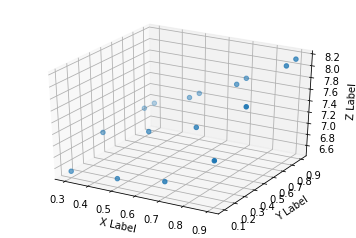

In [82]:
q1Vec = pd.read_table('C_summary.tsv')['q1'].tolist()
q2Vec = pd.read_table('C_summary.tsv')['q2'].tolist()
C_meanVec = pd.read_table('C_summary.tsv')['C_mean'].tolist()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(q1Vec, q2Vec, C_meanVec)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()